
<img src="https://media.salonedellostudente.it/app/uploads/2022/08/10192159/logo_unimarconi_quadrato.png" alt="Unimarconi logo" width="180"/>


---
### **COURSE OF STUDY:**

**Student Name:**  KWASHIE KUDIABOR

**Student ID:**  22170854

**PROJECT:** Predicting Mortality and ART Interruption Risks in HIV Patients Using Machine Learning: A Study from Thyolo District Hospital in Malawi

**Email:** kkudiabor0574@gmail.com

---

## **Mortality Risk Prediction Modelling**

|  |  |
|:---|:---|
|**submission Deadline** |  September 15th, 2024 |
|**Required Skills** | Python, Problem scoping, EDA, Machine learning, Py-torch, Tensorflow,  Performance evaluation, Model Deployment  |
|**Sections** | Introduction, EDA, Modeling, Evaluation, Hyper-parametr tuninhg, Conclusion  |


---

### **Installation of Required Libraries**
In this cell, we install essential libraries for data processing, model training, and handling imbalanced data. This includes:
- **pandas**: for data manipulation
- **pyreadstat**: for reading Stata files
- **tqdm**: for progress bars during long computations
- **imbalanced-learn**: to handle imbalanced datasets


In [ ]:
#Install pyreadstat to allow the reading of the stata file and tqdm to use for implementing the status bar
!pip install pandas pyreadstat
!pip install tqdm
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00


### **Importing Essential Libraries for Data Processing, Visualization, and Modeling**

Next, we import all necessary libraries for the project. These libraries cover a range of tasks including data import, visualization, machine learning, and handling imbalanced data.

- **Basic Utilities**: `os`, `zipfile`, `random`, `time`, and `datetime` for file handling, randomization, timing, and date operations.
- **Data Import and Processing**:
  - `pandas` and `numpy` for data manipulation.
  - `pyreadstat` to handle Stata files.
- **Visualization**:
  - `matplotlib` and `seaborn` for static visualizations.
  - `plotly` for interactive visualizations.
  - `tqdm` to provide progress bars for long computations.
- **Machine Learning**:
  - `sklearn.model_selection` for train-test splitting.
  - `sklearn.metrics` for evaluating model performance.
  - `sklearn.ensemble` for building a random forest model.
  - `sklearn.preprocessing` and `sklearn.impute` for data preprocessing tasks.
- **Handling Imbalanced Data**: `imblearn.over_sampling.RandomOverSampler` for balancing classes in the dataset.
- **Sparse Matrix Utilities**: `scipy.sparse` for handling sparse matrices, commonly used in high-dimensional datasets.


In [ ]:
# Install all necessary libraries

# Basic utilities
import os
import zipfile
import random
import time
from datetime import datetime

# Data import and processing
import pandas as pd
import numpy as np
import pyreadstat

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Handling imbalanced data
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

# Sparse matrix utilities
from scipy.sparse import csr_matrix, hstack

### **Mounting Google Drive**

This cell mounts Google Drive to access files stored there. This is essential for loading data and saving outputs directly to Google Drive for easy access and storage. The command below will prompt for authorization to connect to the user's Google Drive.


In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Defining the Dataset Path**

In this cell, we define the full file path for the dataset. This path points to the location in Google Drive where the `hiv_filtered_data.csv` file is stored, allowing the data to be loaded directly from this location and the next cell reads the CSV file containing the dataset into a pandas DataFrame using `pd.read_csv()`. The `head()` method displays the first few rows of the dataset, allowing us to inspect its structure and contents.


In [ ]:
# Define the full path of the data set
file_path = "/content/drive/My Drive/hiv_filtered_data.csv"

In [ ]:
#Read the csv file
df = pd.read_csv(file_path)
df.head()

<ipython-input-6-1b50091604fb>:2: DtypeWarning: Columns (10,11,16,19,21,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,person_id,current_district_id,current_traditional_authority_id,current_village_id,district,facility_name,birthdate,gender,patient_occupation,relationship_type,...,pregnant_status,transferred_out,transferred_out_reason,treatment_stopped,treatment_stopped_reason,transferred_in,transferred_in_reason,admitted_date,admitted_reason,patient_deceased
0,10100574.0,NaN,NaN,Ndengula,Nsanje,Nsanje District Hospital,2002-08-08,F,Other,Child,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,10100574.0,NaN,NaN,Ndengula,Nsanje,Nsanje District Hospital,2002-08-08,F,Other,Child,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2,10100574.0,NaN,NaN,Ndengula,Nsanje,Nsanje District Hospital,2002-08-08,F,Other,Child,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,10100574.0,NaN,NaN,Ndengula,Nsanje,Nsanje District Hospital,2002-08-08,F,Other,Child,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,10100574.0,NaN,NaN,Ndengula,Nsanje,Nsanje District Hospital,2002-08-08,F,Other,Child,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


In [ ]:
# Check to see the columns in the loaded data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547194 entries, 0 to 10547193
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   person_id                         float64
 1   current_district_id               object 
 2   current_traditional_authority_id  object 
 3   current_village_id                object 
 4   district                          object 
 5   facility_name                     object 
 6   birthdate                         object 
 7   gender                            object 
 8   patient_occupation                object 
 9   relationship_type                 object 
 10  start_date                        object 
 11  date_enrolled                     object 
 12  visit_date                        object 
 13  regimen_at_visit                  object 
 14  bmi_at_visit                      float64
 15  tb_status                         object 
 16  vl_result                         

### **Visualization of Missing Values**
To identify and visualize missing data in the dataset, a heatmap was generated. Missing values are visually represented as distinct patterns in the plot. The heatmap uses colors to indicate the presence of missing values across different columns and rows.

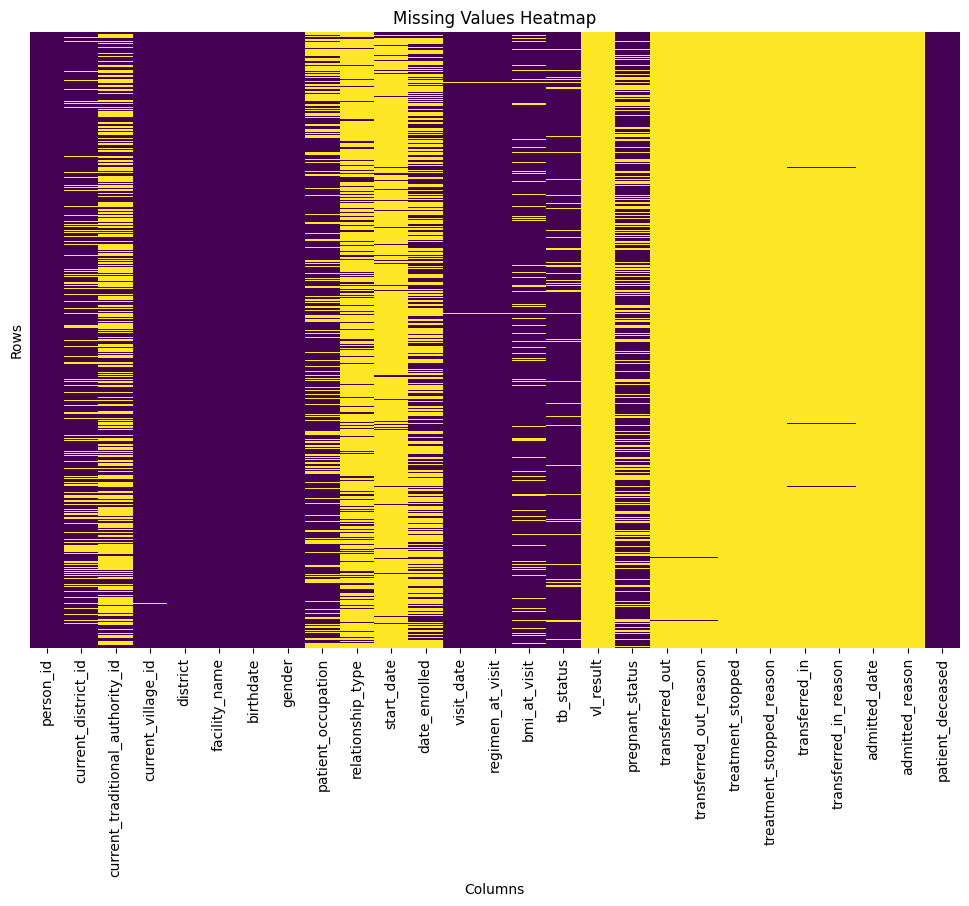

In [ ]:
#Visualize null values

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


The nulls are represented by the yellow coloured part of the graph while the purple color represents the part of the graph that are non-null. Looking at the graph, we can see that there is a lof missingness in the data.

### **Visualize the Distribution of Age and Gender**
The resulting histogram shows the distribution of individuals' ages, categorized by gender, which is useful for understanding the demographics in relation to treatment interruption.
Stacked histograms allow for an easy comparison of the two genders across different age groups, providing insights into age-related trends and patterns within each gender.

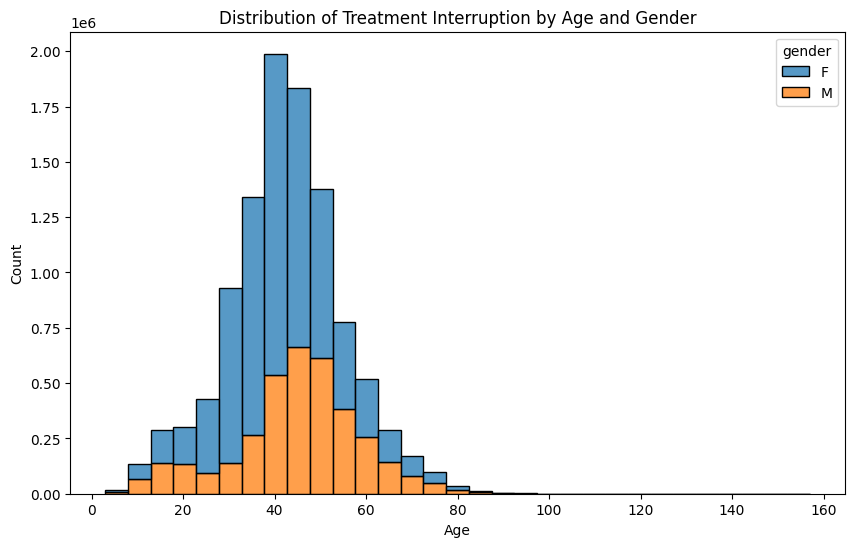

In [ ]:
# Convert birthdate to datetime
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')

# Calculate age by subtracting birthdate from the current date
df['age'] = (datetime.now() - df['birthdate']).dt.days // 365

# Now plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='gender', multiple='stack', kde=False, binwidth=5)
plt.title('Distribution of Treatment Interruption by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### **Treatment Interruption by Occupation**
To explore the relationship between treatment interruption and occupation, we first identified the top 20 most common occupations in the dataset. A count plot is created to visualize the number of treatment interruptions within each occupation, with a distinction between those who experienced treatment interruption and those who did not.


- The count plot visualizes the number of treatment interruptions for each of the top 20 occupations.
- By using the hue='treatment_stopped' argument, the plot provides a clear comparison between those who experienced treatment interruption (treatment_stopped = 1) and those who did not (treatment_stopped = 0) within each occupation.

The distribution allows for easy identification of occupations that have higher rates of treatment interruption, providing valuable insights into the relationship between occupation and treatment adherence.


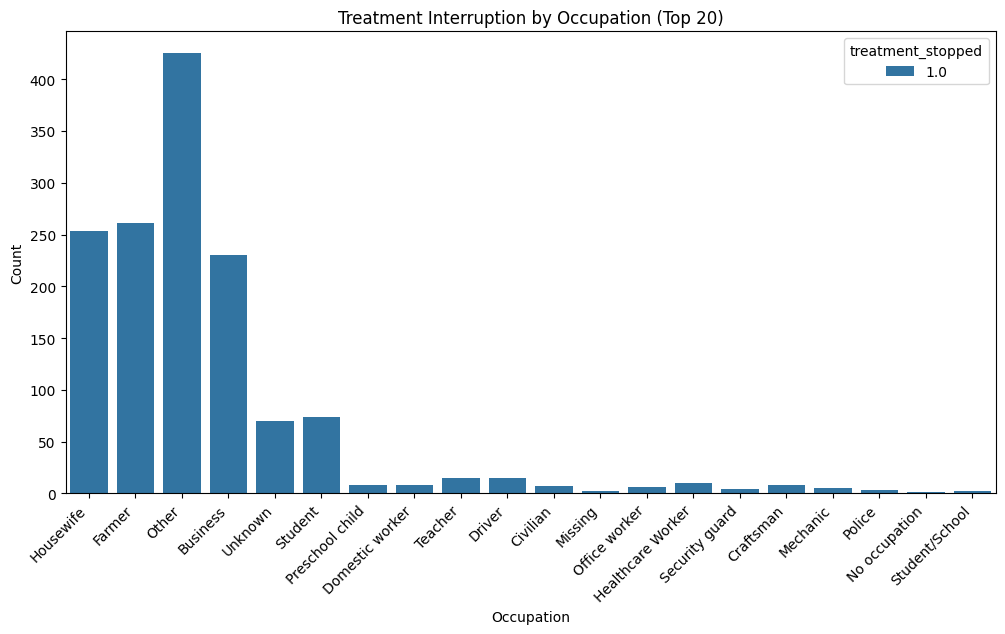

In [ ]:
# Getting the top 20 most common occupations
top_20_occupations = df['patient_occupation'].value_counts().index[:20]

# Plotting treatment interruption by occupation (limited to top 20)
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['patient_occupation'].isin(top_20_occupations)], x='patient_occupation', hue='treatment_stopped', order=top_20_occupations)
plt.title('Treatment Interruption by Occupation (Top 20)')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Data Cleaning and Preparation**
**Converting Date Columns to Datetime Format**

To ensure that date-related columns are in the correct format for analysis, we identified a list of columns that are likely to contain date information. Each of these columns was then converted to the datetime format to facilitate further processing.

-  By converting these columns to the datetime format, we enable efficient handling of date-related operations, such as filtering by date range, calculating time differences, or extracting specific date components (e.g., year, month, day).
- The errors='coerce' ensures that any invalid or missing date values do not cause the process to fail, making the conversion robust.

In [ ]:
# List of columns that are likely to be date-related and need conversion
date_columns = [
    'birthdate', 'start_date', 'date_enrolled', 'visit_date',
    'admitted_date'
]

# Convert each column in date_columns to datetime format
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Display the updated DataFrame dtypes to confirm the changes
print(df.dtypes)

person_id                                  float64
current_district_id                         object
current_traditional_authority_id            object
current_village_id                          object
district                                    object
facility_name                               object
birthdate                           datetime64[ns]
gender                                      object
patient_occupation                          object
relationship_type                           object
start_date                          datetime64[ns]
date_enrolled                       datetime64[ns]
visit_date                          datetime64[ns]
regimen_at_visit                            object
bmi_at_visit                               float64
tb_status                                   object
vl_result                                   object
pregnant_status                             object
transferred_out                            float64
transferred_out_reason         

**Convert columns with a limited number of unique values to category**

In order to optimize memory usage and improve performance, we converted columns with a limited number of unique values to the category data type. This is particularly useful for columns that have a high number of repetitive entries (e.g., categorical variables), as the category type stores values more efficiently.

- This conversion is particularly beneficial for categorical variables (e.g., gender, occupation) and columns with a small number of distinct numeric values.
- By converting suitable columns to category type, we reduce memory usage and improve the performance of operations like grouping, sorting, or filtering.


In [ ]:
# Set a threshold for the maximum number of unique values to convert a column to category type
unique_threshold = 50  # adjust this based on your use case
# Convert columns with limited unique values to category type
for col in df.select_dtypes(include=['object', 'float64']).columns:
    num_unique_values = df[col].nunique()
    if num_unique_values <= unique_threshold:
        df[col] = df[col].astype('category')
        print(f"Converted {col} to category type with {num_unique_values} unique values.")

# Check the data types to verify conversion
print(df.dtypes)


Converted district to category type with 26 unique values.
Converted gender to category type with 2 unique values.
Converted relationship_type to category type with 12 unique values.
Converted regimen_at_visit to category type with 7 unique values.
Converted tb_status to category type with 8 unique values.
Converted vl_result to category type with 32 unique values.
Converted pregnant_status to category type with 5 unique values.
Converted transferred_out to category type with 1 unique values.
Converted transferred_out_reason to category type with 1 unique values.
Converted treatment_stopped to category type with 1 unique values.
Converted treatment_stopped_reason to category type with 1 unique values.
Converted transferred_in to category type with 1 unique values.
Converted transferred_in_reason to category type with 1 unique values.
Converted admitted_reason to category type with 1 unique values.
Converted patient_deceased to category type with 2 unique values.
person_id              

In [ ]:
#Check for the actual number of missing values per column
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


current_district_id                  2188471
current_traditional_authority_id     5664347
current_village_id                      4326
patient_occupation                   3211907
relationship_type                    8316502
start_date                           9805434
date_enrolled                        5747135
visit_date                             51328
regimen_at_visit                       51328
bmi_at_visit                         1585505
tb_status                             811469
vl_result                           10547054
pregnant_status                      3396795
transferred_out                     10522085
transferred_out_reason              10522085
treatment_stopped                   10545311
treatment_stopped_reason            10545311
transferred_in                      10523818
transferred_in_reason               10523818
admitted_date                       10547158
admitted_reason                     10547158
dtype: int64


### **Optimization of Memory Usage**

Optimize memory by adjusting Data Types
To reduce memory usage, we optimized the DataFrame by converting float64 columns to float32 where precision requirements allow, and int64 columns to int32 where applicable. This conversion is particularly effective for large datasets, as smaller data types consume less memory without significantly impacting accuracy.

In [ ]:
#Optimize Memory Usage: Convert columns with float64 to float32 if precision allows, and similarly, consider int32 for int64 columns.
df['person_id'] = df['person_id'].astype('float32')

### **Handling missing Data**

Given our goal of assessing cases where treatment was stopped, the handling of missing data should be focused on ensuring you have accurate and complete information about treatment interruptions. Here’s a step-by-step approach to handle missing data effectively for this purpose:

**Focus on Critical Columns**

For assessing treatment interruptions, focus on the following critical columns:

`treatment_stopped`, `treatment_stopped_date`, `treatment_stopped_reason`, `transferred_out`, `transferred_out_date`, `transferred_out_reason`, `admitted`, `admitted_date`, `admitted_reason`.

In [ ]:
#Checking for data missingness in critical columns:

critical_columns = [
    'treatment_stopped',
    'treatment_stopped_reason',
    'transferred_out',
    'transferred_out_reason',
    'admitted_date',
    'admitted_reason'
]

# Check missing data in critical columns
missing_data = df[critical_columns].isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

# Display missing data information
missing_data_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage of Total': missing_data_percentage
})

print("Missing Data Information in Critical Columns:")
print(missing_data_info)


Missing Data Information in Critical Columns:
                          Missing Values  Percentage of Total
treatment_stopped               10545311            99.982147
treatment_stopped_reason        10545311            99.982147
transferred_out                 10522085            99.761937
transferred_out_reason          10522085            99.761937
admitted_date                   10547158            99.999659
admitted_reason                 10547158            99.999659


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547194 entries, 0 to 10547193
Data columns (total 28 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   person_id                         float32       
 1   current_district_id               object        
 2   current_traditional_authority_id  object        
 3   current_village_id                object        
 4   district                          category      
 5   facility_name                     object        
 6   birthdate                         datetime64[ns]
 7   gender                            category      
 8   patient_occupation                object        
 9   relationship_type                 category      
 10  start_date                        datetime64[ns]
 11  date_enrolled                     datetime64[ns]
 12  visit_date                        datetime64[ns]
 13  regimen_at_visit                  category      
 14  bmi_at_visit    

###**Handle Missing Data**
**Columns with High Missingness**

As seen above, all the columns for analysing treatement stopage display nearly complete missingness. We may want to considerreaching out to the data collection team to verify if there were issues in data collection or recording. If possible, consult with data sources or administrators, stressing the need for deligence in the collection of these data for a posible revisit of the project in future.

**Data Imputation:** If you have auxiliary information or similar datasets, you might impute these fields. However, due to the high proportion of missing data, imputation might not be reliable. Instead, we might want to focus on making use of the data we have and documenting the limitations with this data.

**Drop Rows with Missing Data:** If these columns are crucial and missing data cannot be imputed reliably, we might need to drop rows where treatment stoppage data is missing. Be cautious about the potential loss of information and bias if this option is taken.

### **Analyzing Gender Distribution in the Dataset**
To understand the relationship between gender and other features in the dataset, we first examined the gender distribution. This initial step provides a foundation for comparing how various features might differ across gender groups.

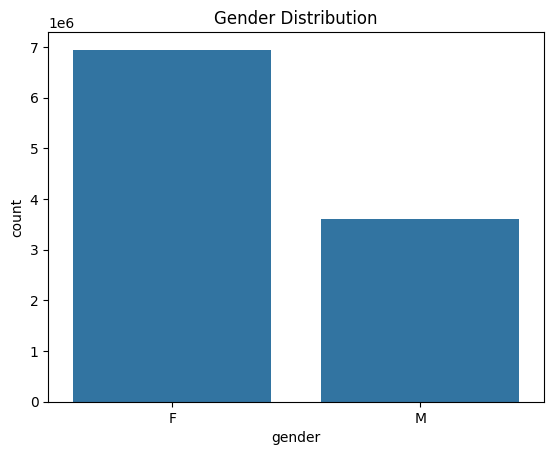

In [ ]:
# Relationship between gender and other features
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()


### **Analyzing the Age Distribution in the Dataset**

To gain insights into the age demographics within our dataset, we visualized the distribution of the age variable. This histogram provides an overview of the frequency of different age groups, helping to identify patterns or concentrations within certain age ranges.

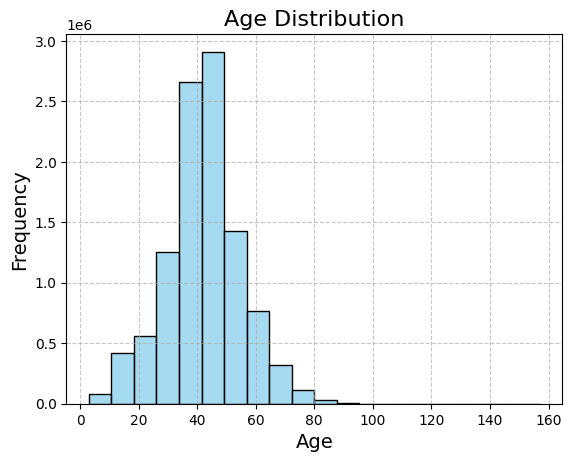

In [ ]:
#Distribution of Age
sns.histplot(df['age'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547194 entries, 0 to 10547193
Data columns (total 28 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   person_id                         float32       
 1   current_district_id               object        
 2   current_traditional_authority_id  object        
 3   current_village_id                object        
 4   district                          category      
 5   facility_name                     object        
 6   birthdate                         datetime64[ns]
 7   gender                            category      
 8   patient_occupation                object        
 9   relationship_type                 category      
 10  start_date                        datetime64[ns]
 11  date_enrolled                     datetime64[ns]
 12  visit_date                        datetime64[ns]
 13  regimen_at_visit                  category      
 14  bmi_at_visit    

### **Converting Date time Data type to numeric data**

Models can only process numeric data. The code below converts datetime columns to Unix timestamps so that they can be considered during the modelling process.

In [ ]:
# Get the list of all date columns in the DataFrame
date_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Convert date columns to datetime (if not already) and then to numeric
for column in date_columns:
    # Convert to datetime (optional if already in datetime format)
    df[column] = pd.to_datetime(df[column], errors='coerce')
    # Convert to Unix timestamp (numeric format)
    df[column] = df[column].astype(int) / 10**9  # Convert to seconds

# Optionally, you might want to convert timestamps to integers
# df[column] = df[column].astype(int)

# Check the DataFrame info to confirm changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547194 entries, 0 to 10547193
Data columns (total 28 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   person_id                         float32 
 1   current_district_id               object  
 2   current_traditional_authority_id  object  
 3   current_village_id                object  
 4   district                          category
 5   facility_name                     object  
 6   birthdate                         float64 
 7   gender                            category
 8   patient_occupation                object  
 9   relationship_type                 category
 10  start_date                        float64 
 11  date_enrolled                     float64 
 12  visit_date                        float64 
 13  regimen_at_visit                  category
 14  bmi_at_visit                      float64 
 15  tb_status                         category
 16  vl_result       

<ipython-input-21-9205529bffc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='patient_deceased', palette='Set2')


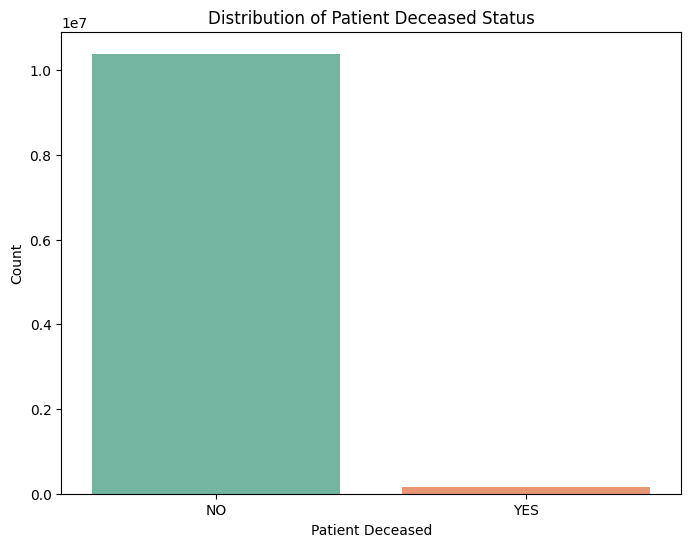

In [ ]:
# Plot the distribution of the 'patient_deceased' column to visualize the data and see if it is balanced
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='patient_deceased', palette='Set2')
plt.title('Distribution of Patient Deceased Status')
plt.xlabel('Patient Deceased')
plt.ylabel('Count')
plt.show()


### **Using the imblearn data library to balance the data**

from the above, we can tell that the target class is imbalanced. Models can be negatively impacterd by imballances iun data. In developing a model that tells if the a patient is likely to be deceased or not, we must first oversample the minority class (patient_deceased) to balance the data. We sample to 250,000 data points and simultaneously undersample the majority class to 250,000 data points.

In [ ]:
# Display the unique values in the 'patient_deceased' column
unique_classes = df['patient_deceased'].unique()
print(unique_classes)


['NO', 'YES']
Categories (2, object): ['NO', 'YES']


In [ ]:
# Identify the minority and majority classes from the original 'df' DataFrame
df_minority = df[df['patient_deceased'] == 'YES']  # Assuming 'YES' represents the minority class
df_majority = df[df['patient_deceased'] == 'NO']   # Assuming 'NO' represents the majority class

# Create an oversampler object targeting 250,000 samples for the minority class ('YES')
ros = RandomOverSampler(sampling_strategy={'YES': 250000}, random_state=123)

# Prepare features and target for resampling
X = df.drop('patient_deceased', axis=1)  # Features
y = df['patient_deceased']               # Labels (target)

# Apply the oversampler to the data to create 250,000 minority class samples
X_resampled, y_resampled = ros.fit_resample(X, y)

# Creating a new DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=df.columns.drop('patient_deceased'))
df_resampled['patient_deceased'] = y_resampled

# Now, filter out the oversampled minority class
df_minority_oversampled = df_resampled[df_resampled['patient_deceased'] == 'YES']

# Downsample the majority class to 250,000 samples
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=250000, # target number of samples
                                   random_state=123) # for reproducibility

# Combine the oversampled minority class with the downsampled majority class
balanced_df = pd.concat([df_majority_downsampled, df_minority_oversampled])

# Shuffle the dataset to randomly mix 'YES' and 'NO' cases
balanced_df = balanced_df.sample(frac=1, random_state=123).reset_index(drop=True)

# Verify the distribution of the target variable
print(balanced_df['patient_deceased'].value_counts())


patient_deceased
NO     250000
YES    250000
Name: count, dtype: int64



**Oversampling the Minority Class (patient_deceased = 'Yes'):**

We used RandomOverSampler to increase the minority class size to 250,000 samples.
Undersampling the Majority Class (patient_deceased = 'No'):

We used resample to reduce the majority class size to 250,000 samples.

**Combine the Data:** We combined the oversampled minority class and the undersampled majority class to create a balanced dataset.

**Shuffle the Combined Data:** We shuffled the dataset to mix the minority and majority classes randomly.

**Assumptions:** The minority class is identified as 'Yes' and the majority class as 'No' for the patient_deceased column.


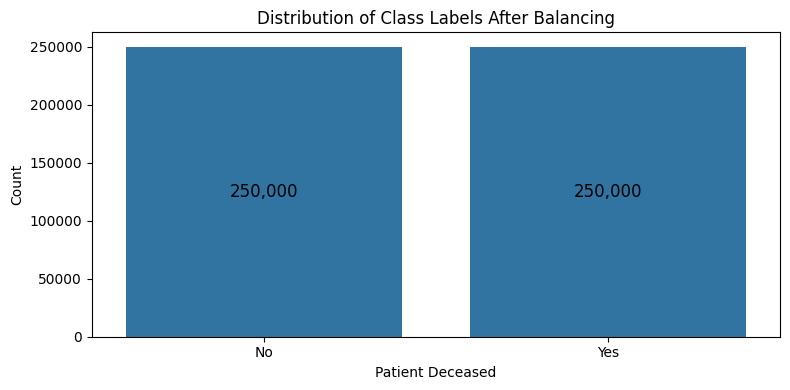

In [ ]:
# Create a count plot to visualize the distribution of the target class (patient_deceased)
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='patient_deceased', data=balanced_df)
plt.title("Distribution of Class Labels After Balancing")
plt.xlabel('Patient Deceased')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate each bar with the count of samples, positioned in the middle of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2., count / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
# Examimne the balanced_df data frame
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   person_id                         500000 non-null  float32 
 1   current_district_id               350141 non-null  object  
 2   current_traditional_authority_id  163245 non-null  object  
 3   current_village_id                499831 non-null  object  
 4   district                          500000 non-null  category
 5   facility_name                     500000 non-null  object  
 6   birthdate                         500000 non-null  float64 
 7   gender                            500000 non-null  category
 8   patient_occupation                370380 non-null  object  
 9   relationship_type                 110653 non-null  category
 10  start_date                        500000 non-null  float64 
 11  date_enrolled                     50000

Since modelling requires only numeric data, we will convert the data we have to numeric. First, let us look at the categorical data and check the number of distinct values withing each categorical feature.

In [ ]:
# List of categorical columns to consider
categorical_columns = [
    'patient_occupation', 'relationship_type', 'facility_name', 'district',
    'prime_partner', 'gender', 'patient_deceased', 'current_district_id',
    'current_traditional_authority_id', 'current_village_id', 'tb_status',
    'vl_result', 'pregnant_status', 'transferred_out_reason', 'treatment_stopped_reason',
    'transferred_in_reason', 'admitted_reason', 'authority_for_plot', 'village_for_plot'
]

# Filter the columns in df that match the list and are also categorical
categorical_columns_in_df = [col for col in categorical_columns if col in df.columns and df[col].dtype.name == 'category']

# Create a Series with the number of unique values for each categorical column in df
unique_values_count = df[categorical_columns_in_df].nunique()

# Print the results
print(unique_values_count)


relationship_type           12
district                    26
gender                       2
patient_deceased             2
tb_status                    8
vl_result                   32
pregnant_status              5
transferred_out_reason       1
treatment_stopped_reason     1
transferred_in_reason        1
admitted_reason              1
dtype: int64


In [ ]:
# Drop the columns with extremely high unique values to prevent high dimensionality
#List of columns to drop
columns_to_drop = ['current_traditional_authority_id', 'current_village_id']

# Drop the specified columns
balanced_df = balanced_df.drop(columns=columns_to_drop)

# Verify that the columns have been dropped
print(balanced_df.columns)


Index(['person_id', 'current_district_id', 'district', 'facility_name',
       'birthdate', 'gender', 'patient_occupation', 'relationship_type',
       'start_date', 'date_enrolled', 'visit_date', 'regimen_at_visit',
       'bmi_at_visit', 'tb_status', 'vl_result', 'pregnant_status',
       'transferred_out', 'transferred_out_reason', 'treatment_stopped',
       'treatment_stopped_reason', 'transferred_in', 'transferred_in_reason',
       'admitted_date', 'admitted_reason', 'patient_deceased', 'age'],
      dtype='object')


In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   person_id                 500000 non-null  float32 
 1   current_district_id       350141 non-null  object  
 2   district                  500000 non-null  category
 3   facility_name             500000 non-null  object  
 4   birthdate                 500000 non-null  float64 
 5   gender                    500000 non-null  category
 6   patient_occupation        370380 non-null  object  
 7   relationship_type         110653 non-null  category
 8   start_date                500000 non-null  float64 
 9   date_enrolled             500000 non-null  float64 
 10  visit_date                500000 non-null  float64 
 11  regimen_at_visit          491624 non-null  category
 12  bmi_at_visit              409388 non-null  float64 
 13  tb_status                 465

In [ ]:
# Save DataFrame as CSV to your google drive
balanced_df.to_csv('/content/drive/My Drive/balanced_df.csv', index=False)


### **Data Preparation and Encoding for Machine Learning**

1. **Define Features and Target**:
   - The target variable, `y`, is set as the `patient_deceased` column.
   - All other columns are included in `X` by dropping `patient_deceased` from the DataFrame `balanced_df`.

2. **Encode Categorical Variables**:
   - To prepare the categorical features for machine learning, one-hot encoding is applied to `X` using `pd.get_dummies()`.
   - The `drop_first=True` option is used to reduce multicollinearity by omitting the first level of each categorical feature.

This process ensures that the dataset is ready for machine learning, with all categorical variables converted into numerical dummy variables suitable for model training.

In [ ]:
# Define the features and target
X = balanced_df.drop('patient_deceased', axis=1)
y = balanced_df['patient_deceased']

# Convert categorical variables to numerical values if necessary (one-hot encoding, label encoding, etc.)
X = pd.get_dummies(X)  # This will automatically handle categorical variables

In [ ]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### **Pipeline for Imputation and Model Training**

1. **Create an Imputer**: A `SimpleImputer` is defined with a strategy of `mean` to handle any missing values in the dataset. Alternative strategies such as `median` or `most_frequent` can also be used based on data characteristics.

2. **Define the Model**: A `RandomForestClassifier` with 100 decision trees (`n_estimators=100`) and a fixed random seed (`random_state=42`) is created as the classifier.

3. **Build the Pipeline**: A `Pipeline` is constructed with two steps: the imputer and the model. This structure allows for seamless data processing and model training in a single workflow.

4. **Train the Model**: The pipeline is trained using `X_train` and `y_train`, where missing values are imputed, and the `RandomForestClassifier` is fitted on the processed data.

5. **Prediction and Evaluation**: Predictions are made on `X_test` with `pipeline.predict()`, ready for evaluation (e.g., accuracy, precision, recall, etc.).

This approach simplifies the process of handling missing values and training the model, making it easy to maintain and evaluate.

In [ ]:
# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns

# Convert datetime columns to numeric (days since the first date)
for col in datetime_cols:
    X[col] = (X[col] - X[col].min()).dt.days  # Days since the minimum date

# Convert boolean columns to integers (True = 1, False = 0)
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Check if all columns are now numeric
print(X.dtypes)

person_id                                       float32
birthdate                                       float64
start_date                                      float64
date_enrolled                                   float64
visit_date                                      float64
                                                 ...   
treatment_stopped_1.0                             int64
treatment_stopped_reason_Treatment stopped        int64
transferred_in_1.0                                int64
transferred_in_reason_Patient transferred in      int64
admitted_reason_Admitted                          int64
Length: 575, dtype: object


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 575 entries, person_id to admitted_reason_Admitted
dtypes: float32(1), float64(6), int64(568)
memory usage: 2.1 GB


In [ ]:
# Create an imputer and a model
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with imputer and model
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate (example)
y_pred = pipeline.predict(X_test)


### **Model Evaluation Summary**

- **Confusion Matrix**: Displays the number of true positives, false positives, true negatives, and false negatives, providing a quick overview of classification errors.
- **Classification Report**: Provides detailed metrics for each class, including precision, recall, F1-score, and support, offering insights into model performance for each category.
- **Accuracy Score**: Measures the overall percentage of correct predictions made by the model.

These evaluation metrics help assess the model's effectiveness and identify areas for improvement.

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[68467  6533]
 [ 2458 72542]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.97      0.91      0.94     75000
         YES       0.92      0.97      0.94     75000

    accuracy                           0.94    150000
   macro avg       0.94      0.94      0.94    150000
weighted avg       0.94      0.94      0.94    150000


Accuracy Score:
0.94006


Confusion Matrix:
[[68467  6533]
 [ 2458 72542]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.97      0.91      0.94     75000
         YES       0.92      0.97      0.94     75000

    accuracy                           0.94    150000
   macro avg       0.94      0.94      0.94    150000
weighted avg       0.94      0.94      0.94    150000


Accuracy Score:
0.94006


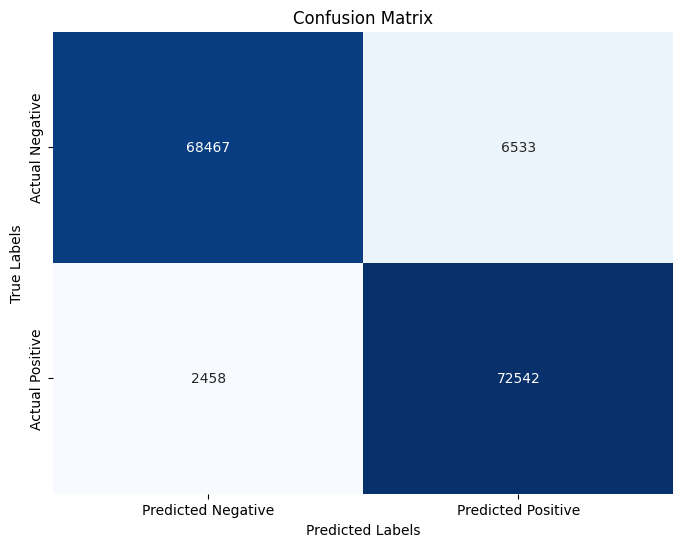

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### **ROC AUC Curve**

**ROC-AUC Score:** This score provides a measure of how well the model can distinguish between classes, with a score closer to 1 indicating better performance.

**ROC Curve:** Visualizes the tradeoff between True Positive Rate (sensitivity) and False Positive Rate (1 - specificity) at different thresholds, helping assess the model's classification ability.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC-AUC Score: 0.988092764


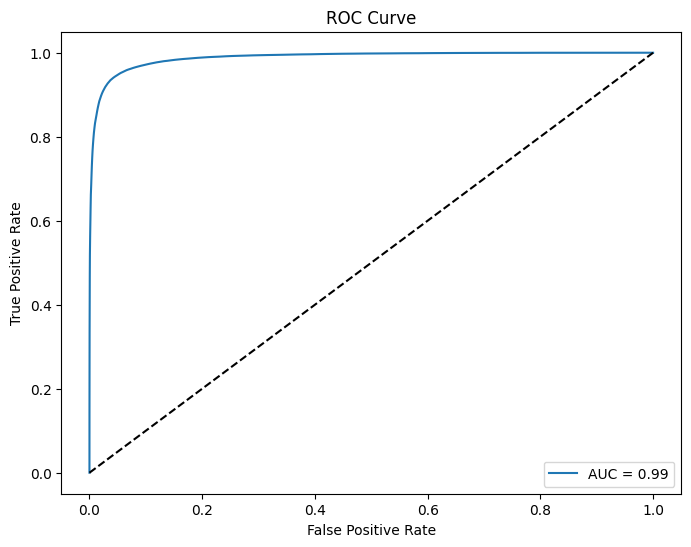

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score  # Add roc_curve here

# Encode 'YES' as 1 and 'NO' as 0
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get the predicted probabilities for the positive class (1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test_encoded, y_pred_prob)
print("ROC-AUC Score:", auc_score)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Our ROC Score is greater than 98% indicating that our model has a very good fit to the data